# Probability

Probability is the measure of the likeliness that an event will occur.  Probability is quantified  as a number between 0 and 1.  The sum of probabilties of all the possible outcomes will equal to 1.

In probability an experiment is an event with an observable outcome, and the sample space is the set of ALL possible UNIQUE outcomes.
As an example our experiment will be flipping a fair coin.

Exp = Flip Coin => Sample Space = {H,T}

Our sample space is that the coin could be Heads or Tails, the two only possibilities. So we can reason that the probabilty of each outcome is 0.5 or 50%.  Below is the simulation.

In [7]:
%matplotlib inline

(array([   3.,   14.,   46.,  172.,  191.,  330.,  184.,   43.,   12.,    4.]),
 array([ 0.24 ,  0.292,  0.344,  0.396,  0.448,  0.5  ,  0.552,  0.604,
         0.656,  0.708,  0.76 ]),
 <a list of 10 Patch objects>)

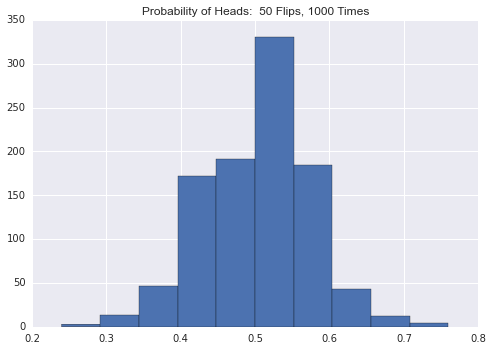

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def coin_toss(flips, prob, trials):
    prob_heads = []
    for i in range(1, trials):
        s = np.random.binomial(1, prob, flips)  # will return a random integer from 0 to 1, 50 times
        prob_heads.append(s.sum()/flips)
        
    return prob_heads


flips = 50          # number of flips per experiment
prob = 0.5          # probability of flipping heads 50% is a fair coin
trials = 1000        # number of times to run the experiment

prob_heads = coin_toss(flips, prob, trials)

plt.title("Probability of Heads:  50 Flips, 1000 Times")
plt.hist(prob_heads)

As you can see form the above plot the observed probability is not always 50%, the probability derived from the empirical evidence does not match the logical probability reasoned from the sample space.  This demonstrates THE CHAOS OF SMALL NUMBERS, because of the small sample size (50 flips), the empircal probabilities vary from the actual probabilities.  Inversely the LAW OF LARGE NUMBERS says if we have enough empirical evidence it should be close to what was derived from logic.  This is demonstrated below.

(array([   4.,   14.,   55.,  136.,  211.,  257.,  176.,   89.,   45.,   12.]),
 array([ 0.4843,  0.4873,  0.4903,  0.4933,  0.4963,  0.4993,  0.5023,
         0.5053,  0.5083,  0.5113,  0.5143]),
 <a list of 10 Patch objects>)

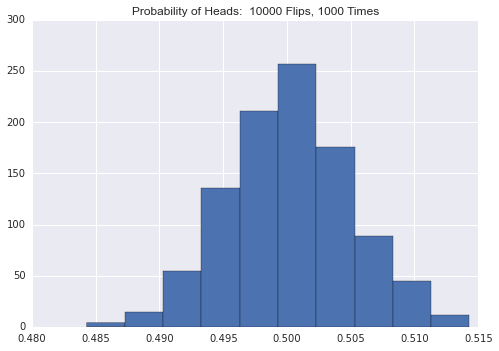

In [25]:
flips = 10000          # number of flips per experiment
prob = 0.5          # probability of flipping heads 50% is a fair coin
trials = 1000        # number of times to run the experiment

prob_heads = coin_toss(flips, prob, trials)

plt.title("Probability of Heads:  10000 Flips, 1000 Times")
plt.hist(prob_heads)

By flipping the coin 10,000 times, much larger than the previous 50, the observed probabilities center much closer to the expected 50%, and the spread of probabilities is much lower.

##The Question of the Hot Hand
How can we use what has been learned so far to think about the question of the hot hand. If a basketball player has abnormally long runs of consecutive baskets in their play, you might say, or the observer might say, that this player has the hot hand.
So first we must decide what is an abnormally long run of baskets. If a player has a 50% chance the making shot and takes 100 consecutive shots, what should be the longest run of baskets we should expect. 

| Trial    | Outcome   | Probability  |
|----------|-----------|--------------|
| 1        | BM        | 1/4          |
| 2        | BBM       | 1/8          |
| x        | BBB...BM  | 1/2exp(n+1)  | 

A run would consist of n number of baskets followed by a miss, which would be a probability of 1 / 2^(n+1).  As an example the probability of a run of 6 made baskets would be 1 /2^(6+1) or 0.78%.  So if we run 1000 trials with a trial ending afer the first miss our expectation is to have at approximately 0.78% x 1000 = 7.81 or 8.


(array([ 507.,  255.,  123.,   57.,   31.,   16.,    9.,    1.,    1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 9 Patch objects>)

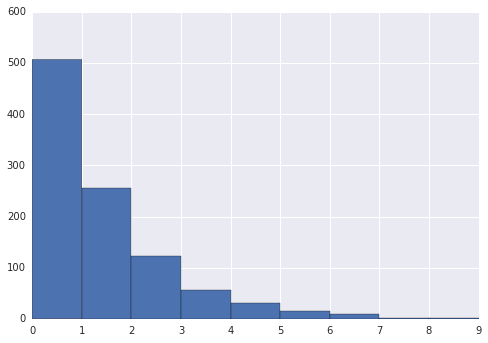

In [50]:
def sim_runs(prob, trials):
    
    length_runs = []
    for i in range(1, trials):
        run = 0
        while np.random.binomial(1, prob):   
             run = run + 1
        else:
            length_runs.append(run)
    
    return np.array(length_runs)
            
prob = 0.5
trials = 1001

length_runs = sim_runs(prob,trials)
bins = length_runs.max()
plt.hist(length_runs, bins=bins)

In [55]:
# Print out the number of runs equal to 6, should be approximately 8 according to our assigned probablilities

pd.value_counts(pd.Series(length_runs))

0    507
1    255
2    123
3     57
4     31
5     16
6      9
9      1
7      1
dtype: int64

We can see in the above plot and table that we got 9 runs of 6 baskets in 1000 trials of the experiment.  This is very close to our expectation of 8. So, if a player does this trial 1000 times, what's the longest run of baskets we would expect in the data?
Well, the longest run of baskets in the data should be equal to the natural logarithm of 1000 over the natural logarithm of 2.
This equals 9.96 or approximately 10, and we see above that the highest runs reached was 9, very close to expectation.

##A Better Question
Based on a fixed amount of shots what would the expected longest runs be.  Take a player shooting 10 field goal attempts per game, playing in 800 games, with a career shooting percent of 50%.  What is the longest run of consecutive baskets that could be expected?
$$ LongestRun = \frac{\ln (800 * 10 * 0.5)} {\ln 2} = 11.9 \approx 12 baskets $$



The longest run is 12


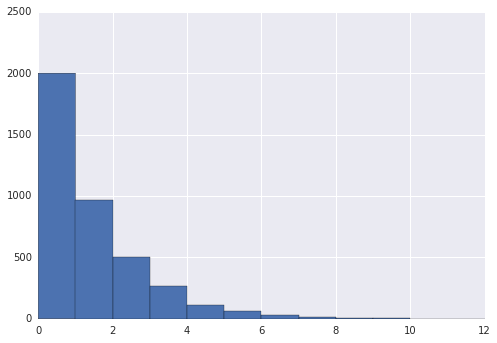

In [66]:
## plot distrabution of runs based on number of shots
shots = np.random.binomial(1, 0.5, 8000)          # get an array of shots

def get_runs(shots):
    
    run = 0
    run_lengths = []                             #empty list for the run lengths

    for shot in shots:
        if(shot):               # if a 1 it was a bakset
            run = run + 1       # increment the run count
        else:
            run_lengths.append(run)   # run is over on miss save run and reset run o zero
            run = 0

    return run_lengths

run_lengths = pd.Series(get_runs(shots))
plt.hist(run_lengths,bins=run_lengths.max())
print("The longest run is {0}".format(run_lengths.max()))

In the simulation the longest run is 12, though if the simulation were run again it would likely vary.

##King James

Can the above be used to determine if King James is indeed a streaky player.  We will compare data from 319 consectutives shots made by Lebron James, a career shooter of approximately 49.6%, to random data generated with 49.6% probability.  As well if we apply the formula

$$ LongestRun = \frac{-\ln (1-p)K} {\ln p} $$

Where K = number of shots, and p is equal to the probability, in this case Lebrons shooting percentage.  Applying the formula we end up with a longest run of 7 basksets.  

The longest length for Lebron is 7 and for the random data is 8
319


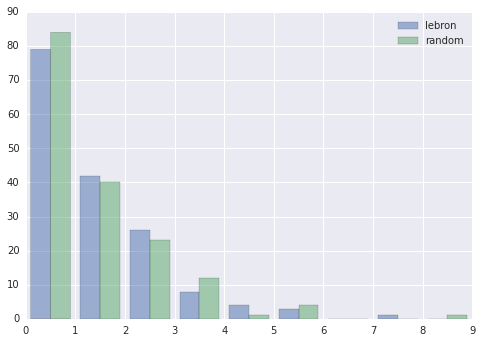

In [119]:
lebron_shots_1_0 = []

lebron_shots = ('BBMMBMBBMMMMMBBBMBMMBMBMMB MBBMBBMMMMMBBMMM BBBMMMBBBMBMMMMB'
                'BBBMMMBBMMBMMMBBBMBMM MMBMBMBBBBBMMB BMBBMMBBMMMMMMMBM' 
                'BMMBBMBBMMBBMBMBMMBBBBBMM BMMMBMMMBMMBBBBM MBMMMBBBBMBMMBBMBMMMMBBM'
                'MBMMMBBMBBMMMBMBMBBBMMMMB MMBBBBBBBMBBMMM BMMBMBBBMMBMBMMB'
                'BMBMMBBMMMBBMMBBBMBMBMB MBBMBBMMBMBMMMBBMMBMBBM'
                'MBMMBBBMBMMBBBBMBMMBMMMB MBMBBMMBBMBBBBBMBM')

lebron_shots = lebron_shots.replace(" ", "")                      # remove the extra whitespace

for shot in lebron_shots:                                         # turn the 'B' and 'M' into 1's and 0's
    if shot == 'B':
        lebron_shots_1_0.append(1)
    else:
        lebron_shots_1_0.append(0)
        
random_shots = np.random.binomial(1, 0.496, len(lebron_shots))      # generate random shots of same length

lebron_lengths = pd.Series(get_runs(lebron_shots_1_0))
random_lengths = pd.Series(get_runs(random_shots))
lebron_max = lebron_lengths.max()
random_max = random_lengths.max()
bins = lebron_max if lebron_max > random_max else random_max
bins = [bin for bin in range(0,bins+2)]

#plt.subplot(121)
plt.hist((lebron_lengths,random_lengths), alpha=0.5, bins=bins, label=('lebron', 'random'))
#plt.hist(lebron_lengths, alpha=0.5, bins=bins, label='lebron')
#plt.legend(loc='upper right')
#plt.subplot(122)
#plt.hist(random_lengths, alpha=0.5, bins=bins,label='random')
plt.legend(loc='upper right')
print("The longest length for Lebron is {0} and for the random data is {1}".format(lebron_max, random_max))
print(len(lebron_shots))

When comparing Lebrons shot lengths to the randomly generated data there is nothing to indicate that Lebrons runs of consectutive baskets are streaky.  That is to say there is no eveidence to suggest that hot hand.

##Conditional Probablility
In probability theory, a conditional probability measures the probability of an event given that (by assumption, presumption, assertion or evidence) another event has occurred. It has the following notations.

$ P(A) $ - is the probability that A occurs

$ P(A|B) $ - is the probability that A occurs given that B has occurred.

$ P(A \bigcap B) $ - is the probability that both A and B occur

Rolling a six sided die twice leads to the following sample space:

In [123]:
x = np.array([1,2,3,4,5,6])
y = np.array([1,2,3,4,5,6])
sample_space = [[x0, y0] for x0 in x for y0 in y]
print(sample_space)

[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6]]


The probability of any single outcome is equal to $ \frac{1}{n} $ with n being equal to the number of outcomes in the sample space.  In this case the probability is equal to 1/36.
The experiment outline will be A is the event that a 4 is observed on the first roll and B is the event that the product of the numbers is bigger than 10.  The following probabilties will be calculated

$$ P(A), P(B), P(A \bigcap B), P(B|A) $$



In [128]:
# calculate the probabilites of the three different events

event_A = 0
event_B = 0
event_AB = 0
event_B_A = 0
sample_space_A = []                 # new sample space for calculating P(B|A) prob of B given A

for outcome in sample_space:
    x, y = outcome
    if x == 4:
        event_A = event_A + 1
        sample_space_A.append(outcome)
    if (x * y) > 10:
        event_B = event_B + 1
    if x == 4 and x * y > 10:
        event_AB = event_AB + 1

for outcome in sample_space_A:
    x, y = outcome
    if x * y > 10:
        event_B_A = event_B_A + 1

print("P(A) = {0}/36".format(event_A))
print("P(B) = {0}/36".format(event_B))
print("P(AnB) = {0}/36".format(event_AB))
print("P(B|A) = {0}/{1}".format(event_B_A, len(sample_space_A)))

P(A) = 6/36
P(B) = 17/36
P(AnB) = 4/36
P(B|A) = 4/6
